---
title: Gaussians
layout: collection
permalink: /Computational-Biology/Gaussians
collection: Computational-Biology
entries_layout: grid
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
---

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

### Moment-generating functions

Given a distribution $\mathbb{P}(x)$, we want to find the distribution $\mathbb{P}\_n(x)$ which is given by the sum $X = \sum^{n}_{i=1} x_i$.
For this we need the so called moment-generating function ($\langle \cdot \rangle$ here is the expectation)

$$
M(t) = \langle e^{xt} \rangle = \int e^{xt} \mathbb{P}(x)dx
$$

The taylor expansion of $M(t)$ around $t = 0$ gives the so called moments $\langle x^n \rangle$ of the distribution $\mathbb{P}(x)$:

$$
M(t) = 1 + \langle x \rangle t + \frac{1}{2}$\langle x^2 \rangle t^2 + \frac{1}{6}\langle x^3 \rangle t^3 + ... + \frac{1}{n!} \langle x^n \rangle t^n
$$

The different moments of the distribution $\mathbb{P}(x)$ are then given by the respective derivatives of the generating moment function:

$$
\langle x^n \rangle = \frac{d^n M(t)}{dt^n} \Bigr|_{t=0}
$$

Looking then at the wanted distribution $\mathbb{P}_n(x)$, if $x_i$ are i.i.d then we get:

$$
\begin{align*}
M_n(t) 
= 
\langle e^{tX} \rangle 
&= 
\int e^{t\sum_{i=1}^n x_i} \mathbb{P}(x_1, ..., x_n) dx_1 \cdot ... \cdot dx_n \\
&=
\prod_{i=1}^n \left[ \int e^{t x_i} \mathbb{P}(x_i) dx_i \right] \\
&=
\prod_{i=1}^n \left[ M(t) \right] \\
&= 
\left[ M(t) \right]^n
\end{align*}
$$

This also holds for when $x_i$ are independant but have a different distribution $\mathbb{P}(x_i)$, then the moment generating function is just $M(t) = \prod^n_{i=1} M_i(t)$

### Cumulants

Taking the logarithm of the generating function we get:

$$
\log \left[ M(t) \right] = \log \left[ 1 + \langle x \rangle t + \frac{1}{2}\langle x^2 \rangle t^2 + \frac{1}{6}\langle x^3 \rangle t^3 + ... + \frac{1}{n!} \langle x^n \rangle t^n \right]
$$

The taylor expansion of the logarithm of the generating function around t = 0 gives us then:

$$
\log \left[ M(t) \right] = C_1 t + C_2 \frac{t^2}{2} + ...
$$

Where the coefficients $C_i$, called the cumulants are given by:

$$
C_i = \frac{d^i log\left[ M(t) \right]}{dt^i} \Bigr|_{t = 0}
$$

Looking at the first we cumulants:

$$
C_1 = \frac{d log\left[ M(t) \right]}{dt} \Bigr|_{t = 0} = \frac{M'(t)}{M(t)} \Bigr|_{t = 0} = \sum^n_{i=0} \frac{\frac{1}{(i-1)!}\langle x^i \rangle t^{i-1}}{M(t)} \Bigr|_{t=0} = \langle x \rangle \\

C_2 = \frac{d^2 log\left[ M(t) \right]}{dt^2} \Bigr|_{t = 0} = \frac{d}{dt} \frac{M'(t)}{M(t)} \Bigr|_{t = 0} = \frac{M''(t)M(t) - M'(t)^2}{M(t)^2} \Bigr|_{t = 0} = \frac{M''(t)}{M(t)} - \left( \frac{M'(t)}{M(t)} \right)^2 \Bigr|_{t = 0} = \langle x^2 \rangle - \langle x \rangle^2
$$

This our first two cumulants are the mean and the variance of our distribution $\mathbb{P}(x)$. The third and fourth cumulants are called the skewness and kurtosis and are given by:

$$
C_3 = \langle (x - \langle x \rangle)^3 \rangle \\
C_4 = \langle (x - \langle x \rangle)^4 \rangle - 3 (\langle x^2 \rangle - \langle x \rangle ^2)^2
$$ 

A positive skewness gives the distribution a left leaning curve, with a longer right tail and a negative skewness the inverse. 
The kurtosis is the measure of the tailedness of a distribution, meaing how often outliers occur. 
A positive kurtosis means less and a negative kurtosis means more outliers. 
For $\mathbb{P}_n(x)$ our cumulant functions is then

$$
\log \left[ M_n (t) \right] = \log \left[ M (t)^n \right] = n \log \left[ M (t) \right]
$$

Thus the cumulants of the sum of variables is the sum of the individual cumulants.
For the cumulants of a gaussian we get

$$
\begin{align*}
M(t) = \int_{-\infty}^{\infty} e^{tx} \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{1}{2\sigma^2} (x - \mu)^2} dx = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{1}{2\sigma^2} (x - \mu)^2 + tx} dx
\end{align*}
$$

Looking specifically at the term inside the exponent

$$
\begin{align*}
-\frac{1}{2\sigma^2} (x - \mu)^2 + tx 
&= 
-\frac{1}{2\sigma^2}(x^2 - 2x \mu + \mu^2 - 2\sigma^2 tx) \\
&= 
-\frac{1}{2\sigma^2}(x^2 - 2x (\mu + t\sigma^2)  + \mu^2) \\
&=
-\frac{1}{2\sigma^2}(x - (\mu + t\sigma^2))^2 + \mu^2 - (\mu + t\sigma^2)^2 \\
&=
-\frac{1}{2\sigma^2}(x - (\mu + t\sigma^2))^2 - 2\mu t \sigma^2 - (t\sigma^2)^2 \\
\end{align*}
$$

Plugging this back in gives us:

$$
\begin{align*}
\int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2\sigma^2}(x - (\mu + t\sigma^2))^2 - 2\mu t \sigma^2 - (t\sigma^2)^2} dx
&= e^{\mu t  + \frac{1}{2}t^2\sigma^2} \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2\sigma^2}(x - (\mu + t\sigma^2))^2} dx
\end{align*}
$$

With the identity of the gaussian integral $\int_{-\infty}^{\infty} \sqrt{\frac{a}{\pi}} e^{-a(x+b)^2} dx$ = 1, we get our generating function for a gaussian distribution:

$$
M(t) = e^{\mu t  + \frac{1}{2}t^2\sigma^2} \Leftrightarrow \log \left[ M(t) \right] = \mu t  + \frac{1}{2}t^2\sigma^2
$$

From this we can see that the first and second cumulants are as expected the mean and variance, but all the higher cumulants are zero. The gaussian distribution is the only distribution has this property, it is the only distribution with a finite number of non-zero cumulants.

### Distribution of the average

For measuring of data, we give our error a distribution $\mathbb{P}(\delta)$ with the cumulants $C_1(\delta) = \langle \delta \rangle$ and $C_2(\delta) = var(\delta)$. If we average our measurements then the error of the average is given by $\bar{\delta}= \frac{1}{n}\sum^n_{i=1}\delta_i = \frac{\triangle}{n}$. We can rewrite our distribution $\mathbb{P}(\bar{\delta})$(with the substitution $\triangle = u := n \bar{\delta} \Rightarrow \frac{d u}{d \bar{\delta}} = n$):

$$
\mathbb{P}(\bar{\delta}) = \tilde{\mathbb{P}}(\triangle(\bar{\delta})) \left| \frac{d \triangle (\bar{\delta})}{d\bar{\delta}} \right| = \tilde{\mathbb{P}}(n\bar{\delta})n
$$

The generating function is then:

$$
M_{\bar{\delta}}(t)= \int e^{t\bar{\delta}} \mathbb{P}(\bar{\delta}) d\bar{\delta} 
= 
\int e^{t\bar{\delta}} \mathbb{P}(n\bar{\delta}) n d\bar{\delta} 
= 
\int e^{t \frac{\triangle}{n}} \mathbb{P}(\triangle) d\triangle
=
M_{\triangle}(\frac{t}{n})
$$

Which gives us the cumulants

$$
C_1(\bar{\delta})t + C_2(\bar{\delta})\frac{t^2}{2}+ C_3(\bar{\delta})\frac{t^3}{6} + ... = C_1(\bar{\delta})t + C_2(\bar{\delta})\frac{t^2}{2}+ C_3(\bar{\delta})\frac{t^3}{6} +
=
n C_1 (\delta) \frac{t}{n} + n C_2 (\delta) \frac{t^2}{2n^2} + n C_3 (\delta) \frac{t^3}{6n^3}
=
C_1 (\delta) t + C_2 (\delta) \frac{t^2}{2n} + C_3 (\delta) \frac{t^3}{6n^2}
$$

From this it follows that

$$
C_1(\bar{\delta}) = C_1(\delta) = \langle \bar{\delta} \rangle = \langle \delta \rangle \\
C_2(\bar{\delta}) = \frac{C_2(\delta)}{n} \Rightarrow var(\bar{\delta}) = \frac{var(\delta)}{n}
$$

Which means that the expected error stays the same but the variance and all the higher cumulants decrease with increasing data size.

### Central limit theorem

The distribution of the deviation from the expected value, scaled by the standard deviation, thus:

$$
z = \frac{\bar{\delta} - \langle \bar{\delta} \rangle}{\sigma(\bar{\delta})} = \frac{\sqrt{n}(\bar{\delta} - \langle \delta \rangle)}{\sigma(\delta)}
$$

is given by the standard Gaussian $\mathbb{P}(z) = \frac{1}{\sqrt{2\pi}}e^{- \frac{1}{2}z^2}$. This also applies generally, if one sums many variables together with finite cumulants, then the sum tends to a gaussian distribution.

### Gaussian distribution

The general form of the gaussian distribution is given by 

$$
\mathbb{P}(x |  \mu, \sigma) = \frac{1}{\sqrt{2 \pi} \sigma}e^{- \frac{1}{2}\left( \frac{x-\mu}{\sigma} \right)^2}
$$

Where $\mu$ is the mean and $\sigma$ the standard deviation.

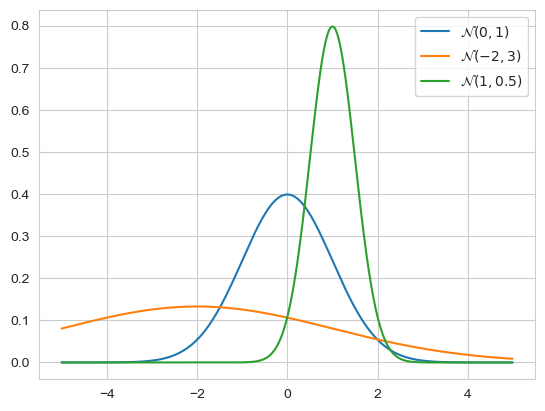

In [10]:
x = np.arange(-5, 5, 0.01)

gauss1 = sp.stats.norm(0, 1)
density1 = gauss1.pdf(x)

gauss2 = sp.stats.norm(-2, 3)
density2 = gauss2.pdf(x)

gauss3 = sp.stats.norm(1, 0.5)
density3 = gauss3.pdf(x)

plt.plot(x, density1, label=r'$\mathcal{N}(0, 1)$')
plt.plot(x, density2, label=r'$\mathcal{N}(-2, 3)$')
plt.plot(x, density3, label=r'$\mathcal{N}(1, 0.5)$')
plt.legend()
plt.show()

The z statistic, $z = \frac{x - \mu}{\sigma}$ , measures how many standard deviations x is away from the mean.
The cumulative probability of the gaussian is given by:

$$
C(x | \mu, \sigma) = \int_{-\infty}^x \mathbb{P}(y | \mu, \sigma)dy = \frac{1}{2}\left[ 1 + erf\left( \frac{x-\mu}{\sigma \sqrt{2}} \right) \right]
$$

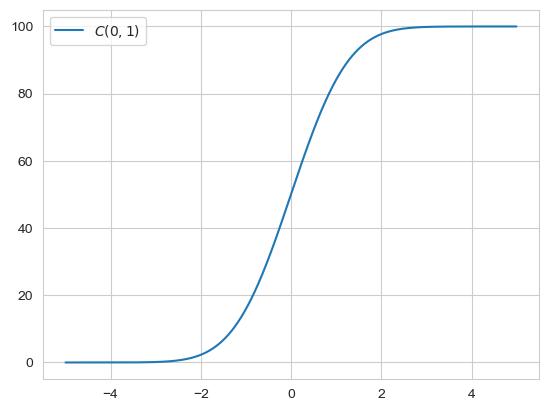

In [12]:
x = np.arange(-5, 5, 0.01)

gauss = sp.stats.norm(0, 1)
density = gauss.pdf(x)

cdf = np.cumsum(density)
plt.plot(x, cdf, label=r'$C(0, 1)$')
plt.legend()
plt.show()

And for some probability confidence intervalls we have
- 68.2 % $\rightarrow [\mu - \sigma, \mu + \sigma]$
- 95.5 % $\rightarrow [\mu - 2\sigma, \mu + 2\sigma]$
- 99.7 % $\rightarrow [\mu - 3\sigma, \mu + 3\sigma]$

### Gauss derivation

For a single measurement the probability of observing $x$ given the true value $\mu$ is given by $\mathbb{P}(x|\mu)$. 
The probability of our data, or the likelihood, assuming that our samples are i.i.d is then given by $\mathbb{P}(\mathcal{D}|\mu) = \prod^n_{i=1}\mathbb{P}(x_i | \mu)$. 
Let be $\mu_*$ bet the value that maximizes the likelihood, i.e. the MLE. 
We then want to find a function, where the MLE is equal to the average of the measurements. 
Assuming a general form of $\mathbb{P}(x | \mu) = f(x - \mu)$ the solution is given by $f(x - \mu) = ce^{-a(x-\mu)^2}$

### Least squares

Assume we have $M$ models that each predict the value of some quantity x in different conditions fore some system of interest. We measure the value of x in a number of conditions $i=1, 2, 3,...,n$ and denote the resulting measurements as the data $\mathcal{D}(y_1,...,y_n)$. Each of our models $M$ predicts the values of the quantity x which we denote as $(x_1, ...,x_n)$ for each condition. Assuming the measurement noise is Gaussian with standard-deviation $\sigma$ we have for the probability of the data given the predictions of a model $M$:

$$
\mathbb{P}(\mathcal{D} | M) = \prod^n_{i=1} \frac{1}{\sqrt{2\pi} \sigma}e^{-\frac{1}{2}\frac{(y_i - x_i)^2}{\sigma^2}}
= 
\frac{1}{(2 \pi \sigma^2)^{n/2}} \exp\left( -\frac{1}{2\sigma^2}\sum^{n}_{i=1}(y_i - x_i)^2 \right)
$$ 
This term is maximised when we minimise the sum inside the exponent, i.e. when $\sum^{n}_{i=1}(y_i - x_i)^2$ is minimised. 

Given the likelihood for a single measurement 
$\mathbb{P}(x|\mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right) }$. 
The likelihood of $n$, i.i.d measurements is 

$$
\mathbb{P}(x_1,...,x_n | \mu, \sigma)= \frac{1}{\sigma^n (2 \pi)^{n/2}} \exp\left[ - \frac{1}{2} \sum^n_{i=1} \left( \frac{x_i - \mu}{\sigma} \right)^2 \right]
$$

The term inside the exponent can be rewritten

$$
\begin{align*}
\sum^n_{i=1} \left( \frac{x_i - \mu}{\sigma} \right)^2 
&= 
\frac{1}{\sigma^2} \left( \sum^n_{i=1} (x_i - \mu)^2 \right) \\
&= 
\frac{1}{\sigma^2} \left( \sum^n_{i=1} x_i^2 - 2x_i \mu + \mu^2 \right) \\
&=
\frac{n}{\sigma^2} \left( (\bar{x^2} - 2\bar{x} \mu + \mu^2) \right) \\
&= 
\frac{n}{\sigma^2} \left( (\bar{x} - \mu)^2 - \bar{x}^2 + \bar{x^2} \right) \\
&=
\frac{n}{\sigma^2} \left( (\bar{x} - \mu)^2 + var(x) \right)
\end{align*}
$$

Which gives us the likelihood function

$$
\mathbb{P}(x_1,...,x_n | \mu, \sigma)= \frac{1}{\sigma^n (2 \pi)^{n/2}} \exp\left[ - \frac{n}{2\sigma^2} \left( (\bar{x} - \mu)^2 + var(x) \right) \right]
$$

Assuming a uniform prior we want to calculate the posterior of this distribution:

$$
\begin{align*}
\mathbb{P}(\mu | x_1,...,x_n, \sigma) 
&= 
\frac{\mathbb{P}(x_1,...,x_n | \mu, \sigma)}{\int_{-\infty}^{\infty} \mathbb{P}(x_1,...,x_n | \mu, \sigma) d\mu} \\
&=
\frac{\frac{1}{\sigma^n (2 \pi)^{n/2}} \exp\left[ - \frac{n}{2\sigma^2} \left( (\bar{x} - \mu)^2 + var(x) \right) \right]}
{\int_{-\infty}^{\infty} \frac{1}{\sigma^n (2 \pi)^{n/2}} \exp\left[ - \frac{n}{2\sigma^2} \left( (\bar{x} - \mu)^2 + var(x) \right) \right] d\mu} \\
&=
\frac{\exp\left[ - \frac{n}{2\sigma^2} \left( (\bar{x} - \mu)^2 \right) \right]}
{\int_{-\infty}^{\infty} \exp\left[ - \frac{n}{2\sigma^2} \left( (\bar{x} - \mu)^2\right) \right] d\mu} \\
&=
\frac{\exp\left[ - \frac{n}{2\sigma^2} \left( (\bar{x} - \mu)^2 \right) \right]}
{\sqrt{\frac{\pi}{\frac{n}{2\sigma^2}}}} \\
&=
\frac{\sqrt{n}}{\sqrt{2\pi \sigma^2}}\exp\left[ - \frac{n}{2\sigma^2} \left( (\bar{x} - \mu)^2 \right) \right] \\
\end{align*}
$$

The posterior is then also a gaussian with a mean of $\ \bar{x}$ and a standard deviation of $\frac{\sigma}{\sqrt{n}}$

### Unknown noise levels

Often we do not know our noise parameter and would like to get rid of it. This can be done by intergrating the distribution over all possible $\sigma 's$ (assuming $\mathbb{P}(\mu, \sigma)$ is uniform):

$$
\mathbb{P}(\mu | \mathcal{D}) 
= 
\int \mathbb{P}(\mu, \sigma | \mathcal{D}) d\sigma 
= 
\frac{\int \mathbb{P}(\mathcal{D}, \mu, \sigma) d\sigma}{\mathbb{P}(\mathcal{D})} 
\propto 
\int \mathbb{P}(\mathcal{D}, \mu, \sigma) d\sigma
=
\int \mathbb{P}(\mathcal{D}|\mu, \sigma) \mathbb{P}(\mu, \sigma) d\sigma 
\propto
\int \mathbb{P}(\mathcal{D}|\mu, \sigma) d\sigma 
$$

Thus solving the integral gives us:

$$
\begin{align*}
\int \mathbb{P}(\mathcal{D}|\mu, \sigma) d\sigma 
&= 
\frac{1}{(2 \pi)^{n/2}} \int_0^{\infty} \frac{1}{\sigma^n} \exp\left[ - \frac{n}{2\sigma^2} \left( (\bar{x} - \mu)^2 + var(x) \right) \right] \\
&=
\frac{1}{(2 \pi)^{n/2}} \int_0^{\infty} \frac{1}{\sigma^n} \exp\left[ - \frac{A}{2\sigma^2} \right] \quad | A:=  n\left( (\bar{x} - \mu)^2 + var(x) \right) 
\end{align*} 
$$

We set $u:= \frac{A}{2 \sigma^2} \Rightarrow \frac{du}{d\sigma} = - \frac{A}{\sigma^3}$ and with $\sigma = \sqrt{\frac{A}{2u}} \Rightarrow \frac{du}{d\sigma} = - \frac{A}{(\sqrt{\frac{A}{2u}})^3} \Leftrightarrow \sqrt{\frac{A}{2}} \frac{1}{2 u^{3/2}} du = d\sigma$

$$
-\frac{1}{(2 \pi)^{n/2}}  \int  \left(\frac{2u}{A} \right)^{n/2} \exp\left[ - u \right] \sqrt{\frac{A}{2}} \frac{1}{2 u^{3/2}} du \propto A^{-(n-1)/2} \int_0^{\infty} 2^{n/2}u^{(n-3)/2}e^{-u} du \propto A^{-(n-1)/2}
$$

Thus we get the so called student distribution

$$
\mathbb{P}(\mu | \mathcal{D}) \propto \left( n \left[ (\mu - \bar{x})^2 + var(x) \right] \right)^{-(n-1)/2} \propto \left(\left[ 1 + \frac{(\mu - \bar{x})^2}{var(x)}\right] \right)^{-(n-1)/2}
$$

Defining the pseudo standard deviation $\tilde{\sigma}(\mu) = \sqrt{\frac{var(x)}{n - 1}}$ and the t-statistic $t = \frac{(\mu - \bar{x})}{\tilde{\sigma}(\mu)}$ gives the transformed distribution

$$
\mathbb{P}(t | \mathcal{D}) \propto \left[1 + \frac{t^2}{n-1} \right]^{-(n - 1)/2} \xrightarrow[]{n \rightarrow \infty} e^{t^2 / 2}
$$
